<a href="https://colab.research.google.com/github/mohansameer1983/DeepLearning/blob/main/20309780_Sameer_Mohan_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MMAI 894 - Exercise 1
## Feedforward artificial neural network : Image classification
The goal of this excercise is to show you how to create your first neural network using the tensorflow/keras library. We will be using the MNIST dataset.

Submission instructions:
- You cannot edit this notebook directly. Save a copy to your drive, and make sure to identify yourself in the title using name and student number
- Do not insert new cells before the final one (titled "Further exploration") 
- Verify that your notebook can _restart and run all_. 
- Select File -> Download as .py (important! not as ipynb)
- Rename the file: `studentID_lastname_firstname_ex1.py`
- The mark will be assessed on the implementation of the functions with #TODO
- **Do not change anything outside the functions**  unless in the further exploration section
- The mark is not based on final accuracy - only on correctness
- Note: You do not have to answer the questions in thie notebook as part of your submission. They are meant to guide you.

- You should not need to use any additional libraries other than the ones listed below. You may want to import additional modules from those libraries, however.

References
- https://keras.io/getting-started/sequential-model-guide/
- https://keras.io/api/utils/python_utils/#to_categorical-function
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
- https://keras.io/api/layers/core_layers/dense/
- https://keras.io/api/layers/regularization_layers/dropout/
- https://keras.io/api/models/model_training_apis/


### Libraries

In [99]:
# Import modules
# Add modules as needed
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# For windows laptops add following 2 lines:
import matplotlib
matplotlib.use('agg')

import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from numpy import argmax
import tensorflow.keras as keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Data preparation

#### Import data

In [32]:
def load_data():
    # Import MNIST dataset from openml
    dataset = fetch_openml('mnist_784', version=1, data_home=None)

    # Data preparation
    raw_X = dataset['data']
    raw_Y = dataset['target']
    return raw_X, raw_Y

raw_X, raw_Y = load_data()



## Consider the following
- what shape is X?
- what value ranges does X take? 
 - might this present a problem? 
 - what transformations need to be applied?
- what shape is Y?
- what value ranges does Y take? 
 - what transformations should be applied?

In [33]:
print ('Shape of X - ', raw_X.shape)
raw_X.info()

Shape of X -  (70000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


In [34]:
print ('Shape of Y - ', raw_X.shape)
raw_Y.describe

Shape of Y -  (70000, 784)


<bound method NDFrame.describe of 0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']>

In [35]:
# Distribution of labels
raw_Y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

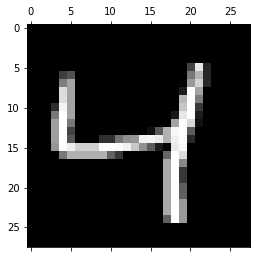

In [36]:
vec = raw_X.iloc[2].values
# numpy provides the reshape() function to reorganize arrays into specified shapes
pixel_mat = vec.reshape(28,28)
plt.matshow(pixel_mat, cmap=plt.cm.gray)
plt.show()

In [58]:
def clean_data(raw_X, raw_Y):
    # TODO: clean, QA, and prep raw_X and raw_Y
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION


    #Normalize pixel values
    norm_X = raw_X.values / 255

    cleaned_X = norm_X.reshape(-1,28,28,1)

    cleaned_Y = to_categorical(raw_Y)
    
    return cleaned_X, cleaned_Y

cleaned_X, cleaned_Y = clean_data(raw_X, raw_Y)

#### Data split

- Split your data into a train set (50%), validation set (20%) and a test set (30%). You may use scikit-learn's train_test_split function.

In [59]:
def split_data(cleaned_X, cleaned_Y):
    # TODO: split the data
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

  X_train, X_test, Y_train, Y_test = train_test_split(cleaned_X, cleaned_Y, test_size=0.3, random_state=1)

  X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=1)
    
  return X_val, X_test, X_train, Y_val, Y_test, Y_train

X_val, X_test, X_train, Y_val, Y_test, Y_train = split_data(cleaned_X, cleaned_Y)

#### [Optional]: plot your data with matplotlib
- Hint: you will need to reshape the row's data into a 28x28 matrix
- https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.imshow.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

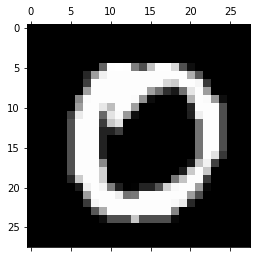

In [65]:
def viz_data(X_train):

    #X_train_sample = X_train[:10,]
    # TODO: (optional) plot your data with matplotlib
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    vec = X_train[2]
    # numpy provides the reshape() function to reorganize arrays into specified shapes
    pixel_mat = vec.reshape(28,28)
    plt.matshow(pixel_mat, cmap=plt.cm.gray)
    plt.show()

viz_data(X_train)

### Model

#### Neural network structure
- For this network, we'll use 2 hidden layers
- Layer 1 should have 128 nodes, a dropout rate of 20%, and relu as its activation function
- Layer 2 should have 64 nodes, a dropout rate of 20%, and relu as its activation function
- The last layer should map back to the 10 possible MNIST class. Use softmax as the activation



In [66]:
def build_model():
    # TODO: build the model, 
    # HINT: you should have Total params: 109,386
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    return model

model = build_model()


# Model compilation

- what loss function should you use?
- Note your choice of optimizer
- Include accuracy as a metric (why are we using accuracy here?)

# Model training
- Use a batch size of 128, and train for 12 epochs
- Use verbose training, include validation data


In [68]:
def compile_model(model):
    # TODO: compile the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    # compile model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, Y_train, X_val, Y_val):
    # TODO: train the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION

    history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_data=(X_val, Y_val), verbose=0)
		
    return model, history


model = compile_model(model)
model, history = train_model(model, X_train, Y_train, X_val, Y_val)

# Model evaluation
- Show the performance on the test set
- What is the difference between "evaluate" and "predict"?
- Identify a few images the model classifies incorrectly. Any observations?

In [69]:
def eval_model(model, X_test, Y_test):
    # TODO: evaluate the model
    # DO NOT CHANGE THE INPUTS OR OUTPUTS TO THIS FUNCTION
    test_loss, test_accuracy = model.evaluate(X_test, Y_test, verbose=0)

    return test_loss, test_accuracy

test_loss, test_accuracy = eval_model(model, X_test, Y_test)


In [71]:

print('> %.3f' % (test_accuracy * 100.0))

# call the predict() function to get the predicted score

> 98.629


In [91]:
wrongPredictionIndexes = []
i = 0
predict_x = model.predict(X_test)
predictions=np.argmax(predict_x,axis=1)
tempList = []

#this loop iterates through y_test and converts a format so we can compare to our predictions
for row in Y_test:
    tempClass = np.argmax(row)
    tempList.append(tempClass)


y_testClasses = np.array(tempList)
for actual, prediction in zip(y_testClasses, predictions):
    if actual != prediction:
        wrongPredictionIndexes.append(i)
    i = i + 1

[143 158]


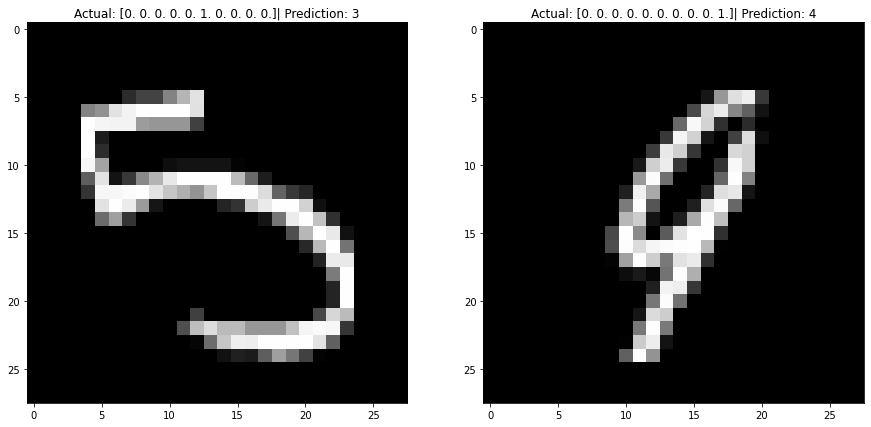

In [98]:
randomIntList = np.random.randint(len(wrongPredictionIndexes), size = 2)
print(randomIntList)
plot = 1
plt.figure(figsize=(15, 8))
for randomNum in randomIntList:
    plt.subplot(1,len(randomIntList),plot)
    imageIndex = wrongPredictionIndexes[randomNum]
    plt.imshow(X_test[imageIndex].reshape(28,28), cmap = 'gray')
    plt.title("Actual: " + str(Y_test[imageIndex]) + "| Prediction: " + str(predictions[imageIndex]))
        
    plot = plot + 1

## Further exploration (Not evaluated)
Looking for something else  to do?
- Transform your code to do hyperparameter search. 
- You can vary the number of nodes in the layers, the drop out rate, the optimizer and the parameters in Adam, the batch size, etc.
